In [1]:
import pyarrow.parquet as pq
import datetime
import pandas as pd
import numpy as np

In [2]:
df = pq.read_table(source='integratedData.parquet.gz').to_pandas()
display(df.head())
###********Check Fire occured in Months to drop some months of data********
fire_occured_df = df[df['fire_occurred']==True]
month_list = [0,0,0,0,0,0,0,0,0,0,0,0]
for item in fire_occured_df['date']:
    month_list[item.month-1] = month_list[item.month-1]+ 1;
print ("Fire Occurence in Each month across years")
print (month_list)
print ("2.83% of Fire happened in the months of November-April. So we will ignore those months in the dataset")
#Drop those Months
df_sorted = df.sort_values(['latitude', 'longitude','date'], ascending=[True,True,True])
df_sorted['month'] = df_sorted.apply(lambda row: row.date.month, axis = 1)
df_sorted['day']   = df_sorted.apply(lambda row: row.date.day, axis = 1)
print ("Shape before dropping data",df_sorted.shape)
df_upd = df_sorted[(df_sorted['month']>4) & (df_sorted['month']<11)]
df_upd.drop(['acres_burned','fire_name'],axis = 1,inplace=True)
print("Shape after dropping data",df_upd.shape)
###*******Drop the locations where Fire never occured********************
df_mult = df_upd.set_index(['longitude', 'latitude'])
df_upd.fire_occurred = df_upd.fire_occurred.astype(int)

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude
0,1999-01-01,0.0,40.3,0.00589,138.0,123.0,1.6,293.1,281.1,24.0,16.0,15.5,34.0,1.7,0.74,False,NaN,None,-117.975000,33.566667
1,1999-01-01,0.0,39.8,0.00590,137.2,123.0,1.6,293.1,281.2,24.0,16.0,15.5,35.0,1.7,0.74,False,NaN,None,-117.933333,33.566667
2,1999-01-01,0.0,38.2,0.00580,137.2,123.0,1.7,293.2,281.2,26.0,15.2,14.9,37.0,1.7,0.77,False,NaN,None,-117.891667,33.566667
3,1999-01-01,0.0,36.4,0.00567,137.3,49.0,1.8,293.3,280.3,27.0,15.0,14.8,38.0,1.8,0.76,False,NaN,None,-117.850000,33.566667
4,1999-01-01,0.0,33.8,0.00538,137.3,49.0,1.9,293.2,279.9,29.0,13.3,13.6,43.0,1.9,0.80,False,NaN,None,-117.808333,33.566667


Fire Occurence in Each month across years
[11, 7, 0, 2, 166, 42, 195, 71, 27, 1197, 0, 25]
2.83% of Fire happened in the months of November-April. So we will ignore those months in the dataset
Shape before dropping data (6826300, 22)


C:\Users\sathishm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Shape after dropping data (3438960, 20)


C:\Users\sathishm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [3]:
df_upd.head()

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,longitude,latitude,month,day
168308,1999-05-01,0.0,55.6,0.00737,335.8,314.0,3.3,291.3,285.7,30.0,14.1,15.8,35.0,4.4,0.58,0,-117.141667,32.483333,5,1
169700,1999-05-02,0.0,58.5,0.00776,336.4,275.0,4.0,290.6,284.9,33.0,14.2,15.8,34.0,4.0,0.42,0,-117.141667,32.483333,5,2
171092,1999-05-03,0.0,62.2,0.00802,218.2,278.0,4.8,288.4,286.8,34.0,14.2,15.7,32.0,3.0,0.34,0,-117.141667,32.483333,5,3
172484,1999-05-04,0.0,71.2,0.00796,272.1,312.0,4.2,288.8,287.5,32.0,14.5,15.7,32.0,3.6,0.41,0,-117.141667,32.483333,5,4
173876,1999-05-05,0.0,64.4,0.00796,341.1,298.0,2.4,292.0,284.8,26.0,14.5,15.5,34.0,4.3,0.48,0,-117.141667,32.483333,5,5


In [4]:
lats = sorted(set(df_upd.latitude.values))
lons = sorted(set(df_upd.longitude.values))

loc_count = 0
Fire_loc_count = 0
NoFire_loc_count = 0
for i in lats:
    for j in lons:
        mask = (df_upd['latitude']==i) & (df_upd['longitude']==j)
        if not df_upd[mask].empty:
            loc_count += 1;
            if 1 in df_upd[mask]['fire_occurred'].values:
                Fire_loc_count += 1;
            else:
                print ("Dropping all data at ",i,j)
                df_upd.drop(sorted(df_upd[mask].index),inplace=True)
                NoFire_loc_count += 1;

display("Total grids are ",loc_count)
display("Grids that had Fire", Fire_loc_count)
display("Grids that didn't have Fire", NoFire_loc_count)

Dropping all data at  32.483333333333334 -117.14166663333334
Dropping all data at  32.483333333333334 -117.09999996666667
Dropping all data at  32.483333333333334 -117.05833330000002
Dropping all data at  32.483333333333334 -117.01666663333334
Dropping all data at  32.483333333333334 -116.97499996666667
Dropping all data at  32.525000000000006 -117.18333330000002
Dropping all data at  32.525000000000006 -117.14166663333334
Dropping all data at  32.525000000000006 -117.09999996666667
Dropping all data at  32.525000000000006 -117.05833330000002
Dropping all data at  32.525000000000006 -117.01666663333334
Dropping all data at  32.525000000000006 -116.97499996666667
Dropping all data at  32.525000000000006 -116.64166663333334
Dropping all data at  32.525000000000006 -116.59999996666667
Dropping all data at  32.525000000000006 -116.55833330000002
Dropping all data at  32.525000000000006 -116.51666663333334
Dropping all data at  32.525000000000006 -116.47499996666667
Dropping all data at  32

Dropping all data at  32.81666666666667 -116.30833330000002
Dropping all data at  32.81666666666667 -116.26666663333334
Dropping all data at  32.81666666666667 -116.22499996666667
Dropping all data at  32.81666666666667 -116.18333330000002
Dropping all data at  32.81666666666667 -116.14166663333334
Dropping all data at  32.81666666666667 -116.09999996666667
Dropping all data at  32.81666666666667 -116.05833330000002
Dropping all data at  32.858333333333334 -117.30833330000002
Dropping all data at  32.858333333333334 -117.26666663333334
Dropping all data at  32.858333333333334 -117.22499996666667
Dropping all data at  32.858333333333334 -116.39166663333334
Dropping all data at  32.858333333333334 -116.34999996666667
Dropping all data at  32.858333333333334 -116.30833330000002
Dropping all data at  32.858333333333334 -116.26666663333334
Dropping all data at  32.858333333333334 -116.22499996666667
Dropping all data at  32.858333333333334 -116.18333330000002
Dropping all data at  32.858333

Dropping all data at  33.19166666666667 -116.18333330000002
Dropping all data at  33.19166666666667 -116.14166663333334
Dropping all data at  33.19166666666667 -116.09999996666667
Dropping all data at  33.19166666666667 -116.05833330000002
Dropping all data at  33.233333333333334 -117.34999996666667
Dropping all data at  33.233333333333334 -117.30833330000002
Dropping all data at  33.233333333333334 -117.26666663333334
Dropping all data at  33.233333333333334 -117.22499996666667
Dropping all data at  33.233333333333334 -117.18333330000002
Dropping all data at  33.233333333333334 -117.14166663333334
Dropping all data at  33.233333333333334 -117.09999996666667
Dropping all data at  33.233333333333334 -117.05833330000002
Dropping all data at  33.233333333333334 -116.76666663333334
Dropping all data at  33.233333333333334 -116.59999996666667
Dropping all data at  33.233333333333334 -116.43333330000002
Dropping all data at  33.233333333333334 -116.39166663333334
Dropping all data at  33.233

Dropping all data at  33.44166666666667 -116.05833330000002
Dropping all data at  33.483333333333334 -117.80833330000002
Dropping all data at  33.483333333333334 -117.76666663333334
Dropping all data at  33.483333333333334 -117.72499996666667
Dropping all data at  33.483333333333334 -117.68333330000002
Dropping all data at  33.483333333333334 -117.64166663333334
Dropping all data at  33.483333333333334 -117.59999996666667
Dropping all data at  33.483333333333334 -117.55833330000002
Dropping all data at  33.483333333333334 -117.51666663333334
Dropping all data at  33.483333333333334 -117.47499996666667
Dropping all data at  33.483333333333334 -117.43333330000002
Dropping all data at  33.483333333333334 -117.39166663333334
Dropping all data at  33.483333333333334 -117.34999996666667
Dropping all data at  33.483333333333334 -117.30833330000002
Dropping all data at  33.483333333333334 -117.26666663333334
Dropping all data at  33.483333333333334 -117.22499996666667
Dropping all data at  33.

'Total grids are '

890

'Grids that had Fire'

360

"Grids that didn't have Fire"

530

In [5]:
df_mod = df_upd.reset_index(drop=True)
#df_upd.shape

In [6]:
columns = [*df_mod.columns, ]
columns.remove('fire_occurred')
display(columns)

['date',
 'precipitation_amount_mm',
 'relative_humidity_%',
 'specific_humidity_kg/kg',
 'surface_downwelling_shortwave_flux_in_air_W m-2',
 'wind_from_direction_Degrees Clockwise from north',
 'wind_speed_m/s',
 'max_air_temperature_K',
 'min_air_temperature_K',
 'burning_index_g_Unitless',
 'dead_fuel_moisture_100hr_Percent',
 'dead_fuel_moisture_1000hr_Percent',
 'energy_release_component-g_Unitless',
 'potential_evapotranspiration_mm',
 'mean_vapor_pressure_deficit_kPa',
 'longitude',
 'latitude',
 'month',
 'day']

In [7]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler
x =     df_mod[df_mod.columns[~df_mod.columns.isin(['fire_occurred','date'])]].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(x)
#norm_Df = pd.DataFrame(data = norm_x, columns = columns)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
lag_list = [10]
#lag_list = [5,10,15,20,25,30,35,40,45,50,55,60]

for lag in lag_list:            
    print ("Every sequence will be",lag, "days long asking LSTM to predict a fire based on past",lag,"days of weather")
    tt_X = []
    tt_y = []
    for i in range(0,df_mod.shape[0],lag):
        if i+lag in df_mod.index:
                tt_X.append(df_mod.iloc[i:i+lag].values)
                tt_y.append(df_mod.iloc[i+lag]['fire_occurred'])
        else:
            print ("Can't create sequence from this index onwards", i)

Every sequence will be 10 days long asking LSTM to predict a fire based on past 10 days of weather
Can't create sequence from this index onwards 1391030


In [9]:
fire_occured_df = df_mod[df_mod['fire_occurred']==1]
#fire_occured_df = df[df['fire_occurred']==True]
mydict = {}
for item in fire_occured_df['date']:
    if item.year in mydict.keys():
        mydict[item.year] += 1
    else:
        mydict[item.year] = 1
        
import pprint        
pprint.pprint(mydict)        

{2002: 47,
 2003: 165,
 2004: 18,
 2005: 6,
 2006: 45,
 2007: 1030,
 2010: 3,
 2011: 63,
 2012: 101,
 2013: 66,
 2014: 103,
 2016: 45,
 2017: 6}


#### We will use data on 2005,2006,2011,2012,2014  for Test Data  (1314 Fires) and post 2010 for Test data(384 Fires)

In [51]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(tt_X, tt_y, test_size=1/4, random_state=0,shuffle=False)
X_train = []
y_train = []
X_test = []
y_test = []
for idx,seq in enumerate(tt_X):
    if (seq[0][0].year >= 2012):
        X_test.append(tt_X[idx])
        y_test.append(tt_y[idx])
    else:
        X_train.append(tt_X[idx])
        y_train.append(tt_y[idx])

In [52]:
len(X_train)

86112

In [53]:
len(X_test)

52991

In [54]:
#Resampling in the Train Dataset
lag = 10
X_train_mod = []
y_train_mod = []
fcnt  = 0
nfcnt = 0
tot = 0
a = 0
b = 0
c = 0
d = 0
for i,seq in enumerate(X_train):
    if 1 in [*seq[:,15],]: #Fire present in Seq
        fcnt += 1
        d0 = X_train[i-1][lag-1][0].date()
        d1 = X_train[i][lag-1][0].date()
        d2 = X_train[i+1][lag-1][0].date()
        if (((d1 - d0).days == lag) & (((d2-d1).days == lag))):
            a += 1
            stackd_seq = np.vstack((X_train[i-1],X_train[i],X_train[i+1]))
            for z in range(0,2*lag):
                X_train_mod.append(stackd_seq[z:z+lag])
                y_train_mod.append(stackd_seq[z+lag][15])
        elif ((d1-d0).days == lag):
            b += 1
            stackd_seq = np.vstack((X_train[i-1],X_train[i]))
            for z in range(0,lag):
                X_train_mod.append(stackd_seq[z:z+lag])
                y_train_mod.append(stackd_seq[z+lag][15])
        elif ((d2-d1).days == lag):
            c += 1
            stackd_seq = np.vstack((X_train[i],X_train[i+1]))
            for z in range(0,lag):
                X_train_mod.append(stackd_seq[z:z+lag])
                y_train_mod.append(stackd_seq[z+lag][15])
        else:
            d += 1
            print ("Unfortunately No consecutive sequence found for the index",i)
    else: #No Fire
        nfcnt += 1
        X_train_mod.append(X_train[i])
        y_train_mod.append(y_train[i])
print ("\t No. of Train sequence w/o fire pre-resampling", nfcnt)
print ("\t No. of Train sequence w/o fire post-resampling ",y_train_mod.count(0))
print ("\t No. of Train sequence w/ fire pre-resampling", fcnt)
print ("\t No. of Train sequence w/ fire post-resampling ",y_train_mod.count(1))

	 No. of Train sequence w/o fire pre-resampling 85547
	 No. of Train sequence w/o fire post-resampling  91518
	 No. of Train sequence w/ fire pre-resampling 565
	 No. of Train sequence w/ fire post-resampling  1289


In [55]:
#Resampling in the Test Dataset.
#This is not necessary, but the fire count is so less, so creating more samples to have good test measure
lag = 10
X_test_mod = []
y_test_mod = []
fcnt  = 0
nfcnt = 0
tot = 0
a = 0
b = 0
c = 0
d = 0
for i,seq in enumerate(X_test):
    if 1 in [*seq[:,15],]: #Fire present in Seq
        fcnt += 1
        d0 = X_test[i-1][lag-1][0].date()
        d1 = X_test[i][lag-1][0].date()
        d2 = X_test[i+1][lag-1][0].date()
        if (((d1 - d0).days == lag) & (((d2-d1).days == lag))):
            a += 1
            stackd_seq = np.vstack((X_test[i-1],X_test[i],X_test[i+1]))
            for z in range(0,2*lag):
                X_test_mod.append(stackd_seq[z:z+lag])
                y_test_mod.append(stackd_seq[z+lag][15])
        elif ((d1-d0).days == lag):
            b += 1
            stackd_seq = np.vstack((X_test[i-1],X_test[i]))
            for z in range(0,lag):
                #print (i,z,z+lag)
                X_test_mod.append(stackd_seq[z:z+lag])
                y_test_mod.append(stackd_seq[z+lag][15])
        elif ((d2-d1).days == lag):
            c += 1
            stackd_seq = np.vstack((X_test[i],X_test[i+1]))
            for z in range(0,lag):
                #print (i,z,z+lag)
                X_test_mod.append(stackd_seq[z:z+lag])
                y_test_mod.append(stackd_seq[z+lag][15])
        else:
            d += 1
            print ("Unfortunately No consecutive sequence found for the index",i)
    else: #No Fire
        nfcnt += 1
        X_test_mod.append(X_test[i])
        y_test_mod.append(y_test[i])
print ("\t No. of Test sequence w/o fire pre-resampling", nfcnt)
print ("\t No. of Test sequence w/o fire post-resampling ",y_test_mod.count(0))
print ("\t No. of Test sequence w/ fire pre-resampling", fcnt)
print ("\t No. of Test sequence w/ fire post-resampling ",y_test_mod.count(1))

	 No. of Test sequence w/o fire pre-resampling 52867
	 No. of Test sequence w/o fire post-resampling  54952
	 No. of Test sequence w/ fire pre-resampling 124
	 No. of Test sequence w/ fire post-resampling  395


In [56]:
#Normalize the train datset
X_train_norm = []
for seq in X_train_mod:
    fire_occurence = seq[:,15]
    temp = np.delete(seq,[0,15],1)
    temp = scaler.transform(temp)
    temp[:,-1]=fire_occurence
    X_train_norm.append(temp)

#Normalize the train datset
X_test_norm = []
for seq in X_test_mod:
    fire_occurence = seq[:,15]
    temp = np.delete(seq,[0,15],1)
    temp = scaler.transform(temp)
    temp[:,-1]=fire_occurence
    X_test_norm.append(temp)

In [57]:
import keras; print(keras.__version__)

2.3.1


In [58]:
from keras import backend as K
import tensorflow as tf

# Compatible with tensorflow backend

def focal_loss(gamma=2., alpha=.25):
	def focal_loss_fixed(y_true, y_pred):
		pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
		pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
		return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
	return focal_loss_fixed

In [59]:
def binary_focal_loss(gamma=2., alpha=.25):
    """
    Binary form of focal loss.
      FL(p_t) = -alpha * (1 - p_t)**gamma * log(p_t)
      where p = sigmoid(x), p_t = p or 1 - p depending on if the label is 1 or 0, respectively.
    References:
        https://arxiv.org/pdf/1708.02002.pdf
    Usage:
     model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    def binary_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred:  A tensor resulting from a sigmoid
        :return: Output tensor.
        """
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))

        epsilon = K.epsilon()
        # clip to prevent NaN's and Inf's
        pt_1 = K.clip(pt_1, epsilon, 1. - epsilon)
        pt_0 = K.clip(pt_0, epsilon, 1. - epsilon)

        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) \
               -K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))

    return binary_focal_loss_fixed

In [60]:
from keras.callbacks import LambdaCallback,EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout
from keras.optimizers import RMSprop, Adam
from keras.utils.data_utils import get_file
from math import sqrt
from sklearn.metrics import confusion_matrix,f1_score,matthews_corrcoef
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sn

def train_model(X_train,X_test,y_train,y_test,input_node,hidden_node,dropout,class_weight,loss_funtion,alpha,gamma,lag):
    input=()
    ##Build LSTM Model
    model = Sequential()
    model.add(LSTM(input_node, input_shape=(X_train[0].shape),activation='relu'))
    model.add(Dense(hidden_node, activation = 'relu'))
    model.add(Dropout(dropout))
    model.add(Dense(2, activation = 'softmax'))
    if (loss_funtion=='binary_crossentropy'):
        model.compile(loss='binary_crossentropy', optimizer='adam')     
    else:
        model.compile(loss=binary_focal_loss(alpha=alpha,gamma=gamma),optimizer='adam')
    #Fit the model
    train_label = np.array(y_train)
    y_invtrain = [1 - crap for crap in y_train]
    train_label_inv = np.array(y_invtrain)
    train_label_np = np.array((train_label_inv,train_label), order='F').T
    
    history = model.fit(np.array(X_train),train_label_np,
                            epochs=25,validation_split = 0.1,
                            verbose=2, shuffle=False,
                            callbacks = [EarlyStopping(monitor='val_loss', patience=3, verbose=1,restore_best_weights=True)],
                            class_weight=class_weight)
    #Visualize Training
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Training pattern')
    plt.legend()
    # make a prediction
    y_pred = model.predict(np.array(X_test))
    #Measure metrics
    y_ppredt=[]
    for i in y_pred:
        if i[0]<i[1]:
            y_ppredt.append(1)
        else:
            y_ppredt.append(0)
    f1 = f1_score(y_test, y_ppredt, average='macro')
    mcc = matthews_corrcoef(y_test, y_ppredt)
    disp = confusion_matrix(y_test,y_ppredt)
    with open("test.csv", "a") as myfile:
        temp_string = "Building LSTM of lag\t" + str(lag) + "," \
                      "with input_node\t" + str(input_node)  + "," \
                      "and hidden_node\t" + str(hidden_node) + "," \
                      "and dropout\t" + str(dropout) + "," \
                      "and class_weight\t" + str(class_weight) + "," \
                      "and loss_funtion\t" + str(loss_funtion) + "," \
                      "of alpha\t" + str(alpha) + ","\
                      "and gamma\t" + str(gamma) + "," \
                      "and received F1_Score:\t" + str(f1) + "," \
                      "and MCC_Score:\t" + str(mcc) + "," \
                      "of CM\t" + str(disp) + "\n"
        myfile.write(temp_string)
        print (temp_string)
    skplt.metrics.plot_confusion_matrix(y_test, y_ppredt)
    plt.show()

{0: 0.5070423304705085, 1: 35.99961210240497}
{0: 8, 1: 36.56149903907752}
	 Fires in the test data 395
Train on 83526 samples, validate on 9281 samples
Epoch 1/25
 - 20s - loss: 0.0574 - val_loss: 0.0238
Epoch 2/25
 - 20s - loss: 0.0333 - val_loss: 0.0290
Epoch 3/25
 - 20s - loss: 0.0289 - val_loss: 0.0265
Epoch 4/25
 - 20s - loss: 0.0285 - val_loss: 0.0630
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping
Building LSTM of lag	10,with input_node	40,and hidden_node	20,and dropout	0.3,and class_weight	None,and loss_funtion	binary_crossentropy,of alpha	0,and gamma	0,and received F1_Score:	0.6305596082590327,and MCC_Score:	0.3015467013580602,of CM	[[54888    64]
 [  325    70]]



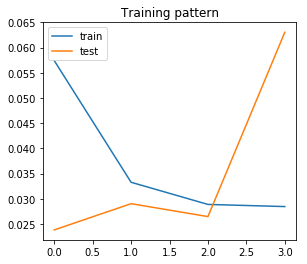

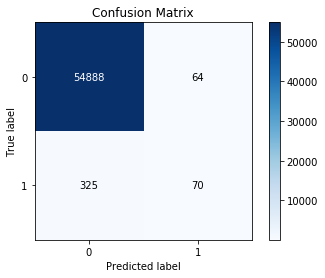

Train on 83526 samples, validate on 9281 samples
Epoch 1/25
 - 26s - loss: 0.0082 - val_loss: 0.0036
Epoch 2/25
 - 22s - loss: 0.0052 - val_loss: 0.0036
Epoch 3/25
 - 22s - loss: 0.0045 - val_loss: 0.0037
Epoch 4/25
 - 22s - loss: 0.0042 - val_loss: 0.0037
Epoch 5/25
 - 22s - loss: 0.0039 - val_loss: 0.0034
Epoch 6/25
 - 23s - loss: 0.0039 - val_loss: 0.0036
Epoch 7/25
 - 24s - loss: 0.0034 - val_loss: 0.0033
Epoch 8/25
 - 23s - loss: 0.0035 - val_loss: 0.0110
Epoch 9/25
 - 22s - loss: 0.0037 - val_loss: 0.0035
Epoch 10/25
 - 22s - loss: 0.0033 - val_loss: 0.0036
Restoring model weights from the end of the best epoch
Epoch 00010: early stopping
Building LSTM of lag	10,with input_node	40,and hidden_node	20,and dropout	0.3,and class_weight	None,and loss_funtion	binary_focal_loss(alpha=alpha,gamma=gamma),of alpha	0.25,and gamma	2,and received F1_Score:	0.6200604038590929,and MCC_Score:	0.2896723125890538,of CM	[[54900    52]
 [  333    62]]



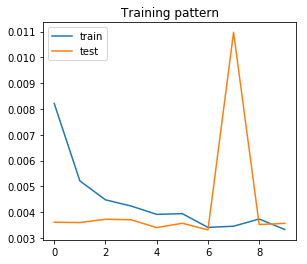

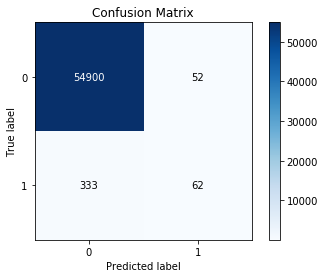

Train on 83526 samples, validate on 9281 samples
Epoch 1/25
 - 22s - loss: 0.0075 - val_loss: 0.0038
Epoch 2/25
 - 21s - loss: 0.0049 - val_loss: 0.0036
Epoch 3/25
 - 21s - loss: 0.0045 - val_loss: 0.0038
Epoch 4/25
 - 22s - loss: 0.0041 - val_loss: 0.0035
Epoch 5/25
 - 22s - loss: 0.0040 - val_loss: 0.0035
Epoch 6/25
 - 22s - loss: 0.0038 - val_loss: 0.0037
Epoch 7/25
 - 23s - loss: 0.0037 - val_loss: 0.0035
Epoch 8/25
 - 24s - loss: 0.0034 - val_loss: 0.0036
Epoch 9/25
 - 22s - loss: 0.0033 - val_loss: 0.0035
Epoch 10/25
 - 21s - loss: 0.0031 - val_loss: 0.0037
Restoring model weights from the end of the best epoch
Epoch 00010: early stopping
Building LSTM of lag	10,with input_node	40,and hidden_node	20,and dropout	0.3,and class_weight	None,and loss_funtion	binary_focal_loss(alpha=alpha,gamma=gamma),of alpha	0.15,and gamma	2,and received F1_Score:	0.5891125207248971,and MCC_Score:	0.23229978369310852,of CM	[[54907    45]
 [  351    44]]



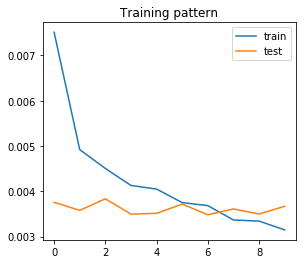

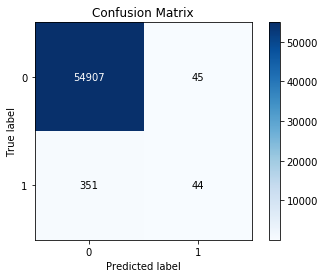

Train on 83526 samples, validate on 9281 samples
Epoch 1/25
 - 23s - loss: 0.4121 - val_loss: 0.2721
Epoch 2/25
 - 23s - loss: 0.2399 - val_loss: 0.2598
Epoch 3/25
 - 21s - loss: 0.2132 - val_loss: 0.2720
Epoch 4/25
 - 20s - loss: 0.1985 - val_loss: 0.2929
Epoch 5/25
 - 20s - loss: 0.2023 - val_loss: 0.2555
Epoch 6/25
 - 20s - loss: 0.1851 - val_loss: 0.2554
Epoch 7/25
 - 20s - loss: 0.1729 - val_loss: 0.2549
Epoch 8/25
 - 21s - loss: 0.2831 - val_loss: 0.2693
Epoch 9/25
 - 22s - loss: 0.1632 - val_loss: 0.2610
Epoch 10/25
 - 21s - loss: 0.1640 - val_loss: 0.2548
Epoch 11/25
 - 21s - loss: 0.1604 - val_loss: 0.2531
Epoch 12/25
 - 20s - loss: 7.3964 - val_loss: 2.5651
Epoch 13/25
 - 20s - loss: 8.2590 - val_loss: 2.5651
Epoch 14/25
 - 20s - loss: 8.2590 - val_loss: 2.5651
Restoring model weights from the end of the best epoch
Epoch 00014: early stopping
Building LSTM of lag	10,with input_node	40,and hidden_node	20,and dropout	0.3,and class_weight	{0: 0.5070423304705085, 1: 35.9996121024

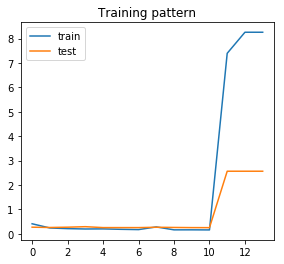

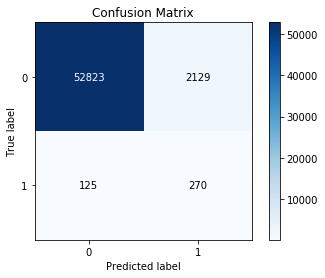

Train on 83526 samples, validate on 9281 samples
Epoch 1/25
 - 20s - loss: 0.0252 - val_loss: 0.0073
Epoch 2/25
 - 20s - loss: 0.0190 - val_loss: 0.0070
Epoch 3/25
 - 20s - loss: 0.0169 - val_loss: 0.0071
Epoch 4/25
 - 20s - loss: 0.0155 - val_loss: 0.0070
Epoch 5/25
 - 21s - loss: 0.0148 - val_loss: 0.0073
Restoring model weights from the end of the best epoch
Epoch 00005: early stopping
Building LSTM of lag	10,with input_node	40,and hidden_node	20,and dropout	0.3,and class_weight	{0: 0.5070423304705085, 1: 35.99961210240497},and loss_funtion	binary_focal_loss(alpha=alpha,gamma=gamma),of alpha	0.25,and gamma	2,and received F1_Score:	0.600649326196748,and MCC_Score:	0.2385821769159991,of CM	[[54883    69]
 [  342    53]]



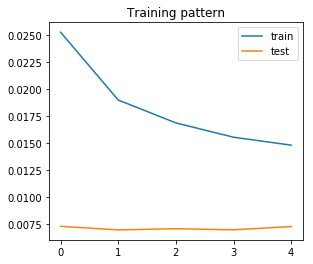

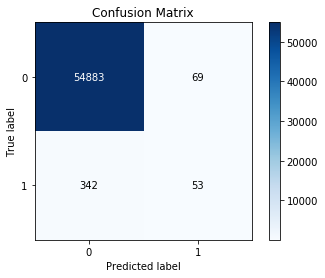

Train on 83526 samples, validate on 9281 samples
Epoch 1/25
 - 20s - loss: 0.0237 - val_loss: 0.0067
Epoch 2/25
 - 21s - loss: 0.0172 - val_loss: 0.0074
Epoch 3/25
 - 20s - loss: 0.0166 - val_loss: 0.0066
Epoch 4/25
 - 19s - loss: 0.0154 - val_loss: 0.0068
Epoch 5/25
 - 20s - loss: 0.0152 - val_loss: 0.0072
Epoch 6/25
 - 20s - loss: 0.0147 - val_loss: 0.0113
Restoring model weights from the end of the best epoch
Epoch 00006: early stopping
Building LSTM of lag	10,with input_node	40,and hidden_node	20,and dropout	0.3,and class_weight	{0: 0.5070423304705085, 1: 35.99961210240497},and loss_funtion	binary_focal_loss(alpha=alpha,gamma=gamma),of alpha	0.15,and gamma	2,and received F1_Score:	0.6176678982858327,and MCC_Score:	0.2774476371483461,of CM	[[54890    62]
 [  333    62]]



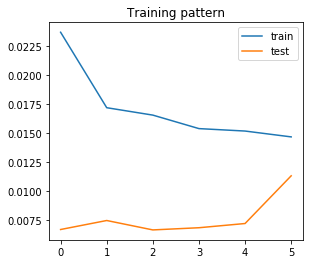

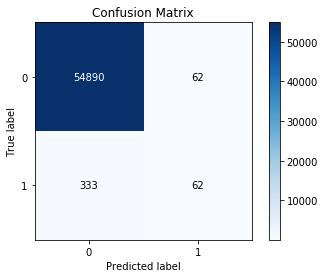

Train on 83526 samples, validate on 9281 samples
Epoch 1/25
 - 24s - loss: 1.2973 - val_loss: 0.6787
Epoch 2/25
 - 24s - loss: 0.7615 - val_loss: 0.6143
Epoch 3/25
 - 21s - loss: 0.6497 - val_loss: 0.6248
Epoch 4/25
 - 21s - loss: 0.5933 - val_loss: 0.5961
Epoch 5/25
 - 22s - loss: 0.5459 - val_loss: 0.7552
Epoch 6/25
 - 22s - loss: 0.5380 - val_loss: 0.6752
Epoch 7/25
 - 22s - loss: 0.4999 - val_loss: 0.7663
Restoring model weights from the end of the best epoch
Epoch 00007: early stopping
Building LSTM of lag	10,with input_node	40,and hidden_node	20,and dropout	0.3,and class_weight	{0: 8, 1: 36.56149903907752},and loss_funtion	binary_crossentropy,of alpha	0,and gamma	0,and received F1_Score:	0.7124899808111838,and MCC_Score:	0.435664811011501,of CM	[[54837   115]
 [  256   139]]



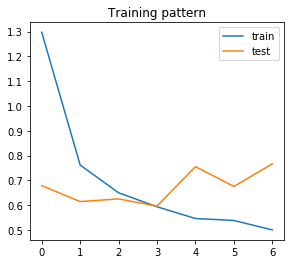

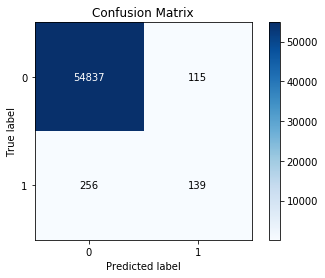

Train on 83526 samples, validate on 9281 samples
Epoch 1/25
 - 21s - loss: 0.0812 - val_loss: 0.0392
Epoch 2/25
 - 21s - loss: 0.0503 - val_loss: 0.0321
Epoch 3/25
 - 21s - loss: 0.0458 - val_loss: 0.0321
Epoch 4/25
 - 20s - loss: 0.0418 - val_loss: 0.0338
Epoch 5/25
 - 21s - loss: 0.0395 - val_loss: 0.0324
Restoring model weights from the end of the best epoch
Epoch 00005: early stopping
Building LSTM of lag	10,with input_node	40,and hidden_node	20,and dropout	0.3,and class_weight	{0: 8, 1: 36.56149903907752},and loss_funtion	binary_focal_loss(alpha=alpha,gamma=gamma),of alpha	0.25,and gamma	2,and received F1_Score:	0.5454286305825666,and MCC_Score:	0.1856452757497059,of CM	[[54943     9]
 [  375    20]]



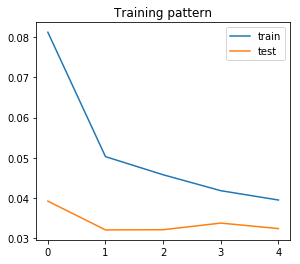

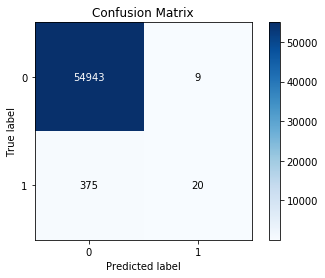

Train on 83526 samples, validate on 9281 samples
Epoch 1/25
 - 23s - loss: 0.0676 - val_loss: 0.0351
Epoch 2/25
 - 20s - loss: 0.0490 - val_loss: 0.0357
Epoch 3/25
 - 21s - loss: 0.0463 - val_loss: 0.0335
Epoch 4/25
 - 21s - loss: 0.0435 - val_loss: 0.0338
Epoch 5/25
 - 20s - loss: 0.0407 - val_loss: 0.0374
Epoch 6/25
 - 21s - loss: 0.0385 - val_loss: 0.0336
Restoring model weights from the end of the best epoch
Epoch 00006: early stopping
Building LSTM of lag	10,with input_node	40,and hidden_node	20,and dropout	0.3,and class_weight	{0: 8, 1: 36.56149903907752},and loss_funtion	binary_focal_loss(alpha=alpha,gamma=gamma),of alpha	0.15,and gamma	2,and received F1_Score:	0.5981093527921226,and MCC_Score:	0.2831598771341804,of CM	[[54932    20]
 [  349    46]]



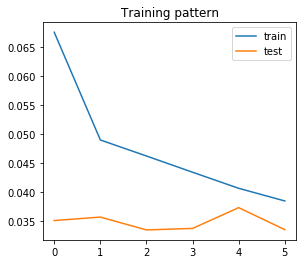

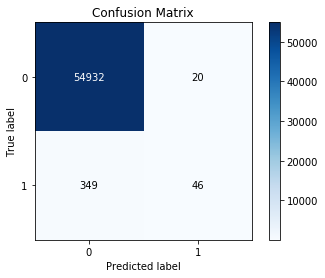

In [61]:
import os

try:
    os.remove("test.csv")
except OSError:
    pass

#Hyper Parameter for Tuning    
#     input_node_list = [10,20,30,40,50]
#     hidden_node_list = [10,20,30,40,50]
#     dropout_list = [0.2,0.3,0.4,0.5,0.6]
#     alpha_list = [0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95,1]
#     loss_function_list=['binary_crossentropy','binary_focal_loss(alpha=alpha,gamma=gamma)']   
#     gamma_list=[1,2,3,5,7,9]
input_node_list = [40]
hidden_node_list = [20]
dropout_list = [0.3]
alpha_list = [0.25,0.15]
loss_function_list=['binary_crossentropy','binary_focal_loss(alpha=alpha,gamma=gamma)']   
gamma_list=[2]
from sklearn.utils import class_weight
temp = class_weight.compute_class_weight('balanced',np.unique(y_train_mod),y_train_mod)
class_weight = dict(enumerate(temp))
print (class_weight)
class_weight_mod = {0: 8, 1: 36.56149903907752}
print (class_weight_mod)
class_weights_list=['None',class_weight,class_weight_mod]
print ("\t Fires in the test data", y_test_mod.count(1))
for input_node in input_node_list:
    for hidden_node in hidden_node_list:
        for dropout in dropout_list:
            for class_weights in class_weights_list:
                for loss_funtion in loss_function_list:
                    if (loss_funtion=='binary_crossentropy'):
                        alpha = 0
                        gamma = 0
                        train_model(X_train_norm,X_test_norm,y_train_mod,y_test_mod,input_node,hidden_node,dropout,class_weights,loss_funtion,alpha,gamma,lag)
                    else:
                        for gamma in gamma_list:
                            for alpha in alpha_list:
                                train_model(X_train_norm,X_test_norm,y_train_mod,y_test_mod,input_node,hidden_node,dropout,class_weights,loss_funtion,alpha,gamma,lag)

In [126]:
#Normalize data

df_mod['year'] = df_mod.apply(lambda row: row.date.year, axis = 1)
columns = [*df_mod.columns, ]
columns.remove('date')
columns.remove('year')
x =     df_mod[df_mod.columns[~df_mod.columns.isin(['date','year'])]].values
scaler = MinMaxScaler(feature_range=(0, 1))
norm_Df = pd.DataFrame(data = scaler.fit_transform(x), columns = columns)
norm_Df['year'] = df_mod['year']

df1 = norm_Df[norm_Df['year']>=2012]
df2 = norm_Df[norm_Df['year']<2012]

In [127]:
col_list = ['precipitation_amount_mm', 'relative_humidity_%','specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north', 'wind_speed_m/s',
       'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm', 'mean_vapor_pressure_deficit_kPa']

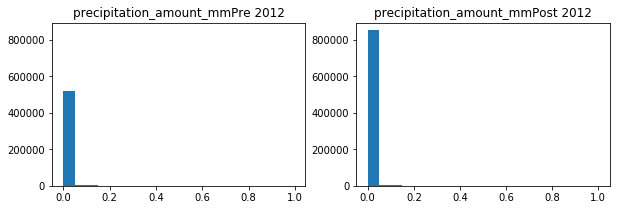

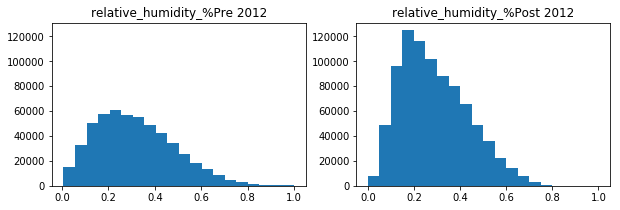

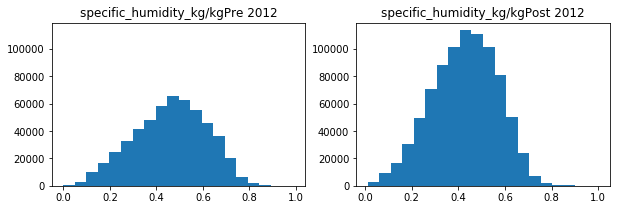

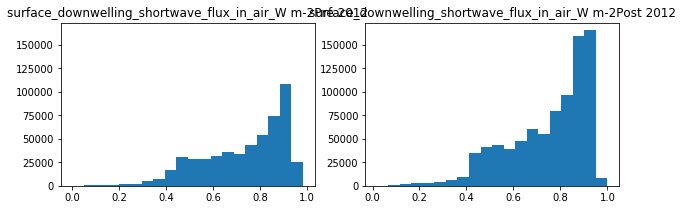

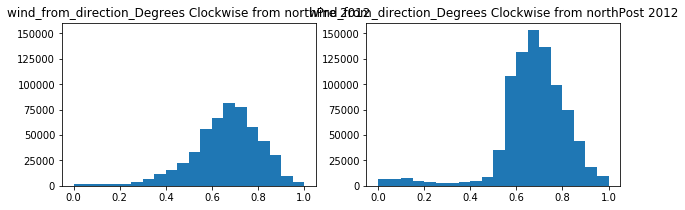

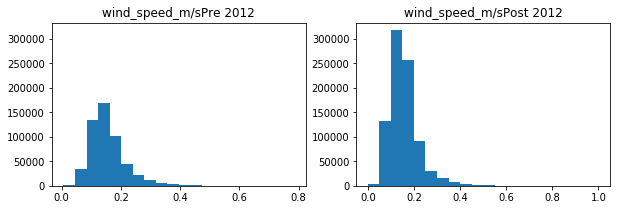

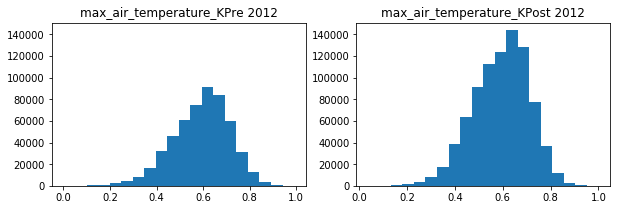

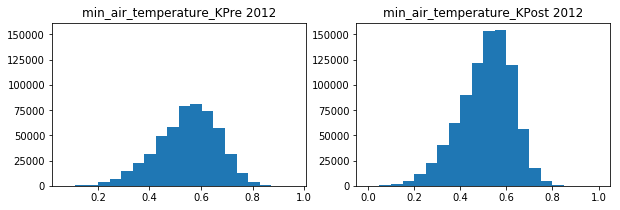

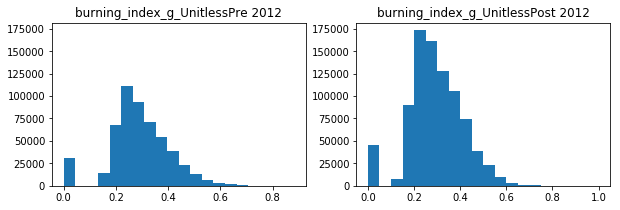

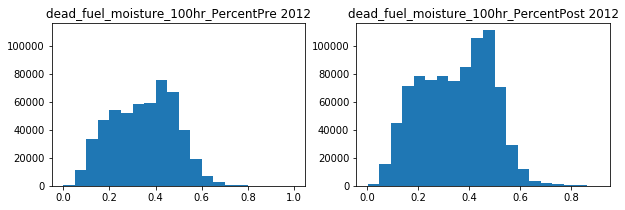

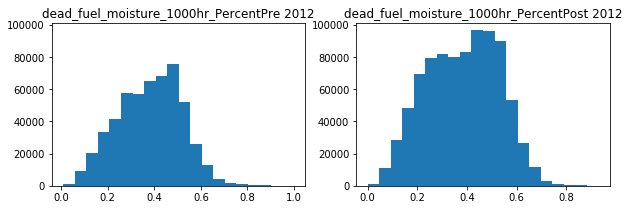

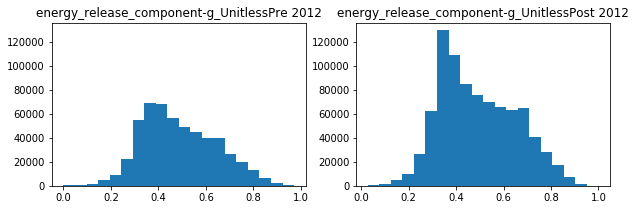

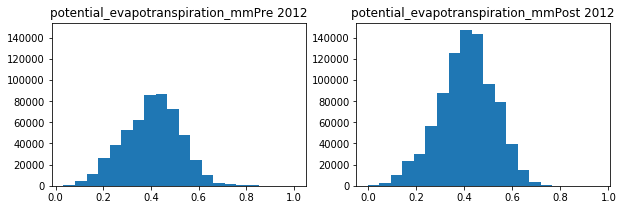

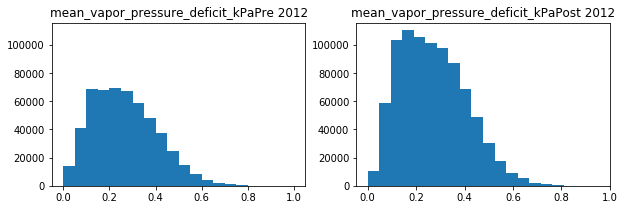

In [131]:
for item in col_list:
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122,sharey = ax)
    ax.hist(df1[item], bins = 20)
    ax2.hist(df2[item], bins = 20)
    ax.title.set_text(item + 'Pre 2012')
    ax2.title.set_text(item + 'Post 2012')